## Observations and Insights 

In [59]:

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


combined_mouse_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined_mouse_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [60]:
number_of_mice = len(mouse_metadata["Mouse ID"])
number_of_mice

249

In [61]:
dup_mouse = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouse

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26

In [62]:
dup_mouse_id = dup_mouse.drop_duplicates()
dup_mouse_id

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26

In [63]:
Clean_Mouse_DF = combined_mouse_df.loc[combined_mouse_df['Mouse ID'] != 'g989']     

Clean_Mouse_DF.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [64]:
# Checking the number of mice in the clean DataFrame.
clean_of_mice = Clean_Mouse_DF["Mouse ID"].value_counts()
clean_of_mice

x401    10
j119    10
a275    10
s337    10
z795    10
        ..
l872     1
v199     1
u153     1
f932     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [65]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Clean_Mouse_DF.describe()

Timepoint  Tumor Volume (mm3)  Metastatic Sites   Age_months  \
count  1880.000000         1880.000000       1880.000000  1880.000000   
mean     19.606383           50.435293          1.025000    12.757979   
std      14.094238            8.914197          1.139971     7.181998   
min       0.000000           22.050126          0.000000     1.000000   
25%       5.000000           45.000000          0.000000     7.000000   
50%      20.000000           48.933454          1.000000    13.000000   
75%      30.000000           56.324075          2.000000    19.250000   
max      45.000000           78.567014          4.000000    24.000000   

        Weight (g)  
count  1880.000000  
mean     25.660106  
std       3.935064  
min      15.000000  
25%      25.000000  
50%      27.000000  
75%      29.000000  
max      30.000000

In [66]:
tumor_volume_stats = Clean_Mouse_DF[['Drug Regimen', 'Tumor Volume (mm3)']]

tumor_df = tumor_volume_stats.groupby(["Drug Regimen"]).mean()
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumor_df['Std. Dev. Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).std()
tumor_df['Median Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).median()
tumor_df['Variance Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).var()
tumor_df['SEM Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).sem()
tumor_df

Mean Tumor Volume  Std. Dev. Tumor Volume  Median Tumor Volume  \
Drug Regimen                                                                   
Capomulin             40.675741                4.994774            41.557809   
Ceftamin              52.591172                6.268188            51.776157   
Infubinol             52.884795                6.567243            51.820584   
Ketapril              55.235638                8.279709            53.698743   
Naftisol              54.331565                8.134708            52.509285   
Placebo               54.033581                7.821003            52.288934   
Propriva              52.320930                6.622085            50.446266   
Ramicane              40.216745                4.846308            40.673236   
Stelasyn              54.233149                7.710419            52.431737   
Zoniferol             53.236507                6.966589            51.818479   

              Variance Tumor Volume  SEM Tumor Volume  
Drug Regimen                                           
Capomulin                 24.947764          0.329346  
Ceftamin                  39.290177          0.469821  
Infubinol                 43.128684          0.492236  
Ketapril                  68.553577          0.603860  
Naftisol                  66.173479          0.596466  
Placebo                   61.168083          0.581331  
Propriva                  43.852013          0.544332  
Ramicane                  23.486704          0.320955  
Stelasyn                  59.450562          0.573111  
Zoniferol                 48.533355          0.516398

## Bar Plots

In [67]:
mice_per_treatment_df = Clean_Mouse_DF.groupby(['Drug Regimen']).count()['Mouse ID']
mice_per_treatment_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

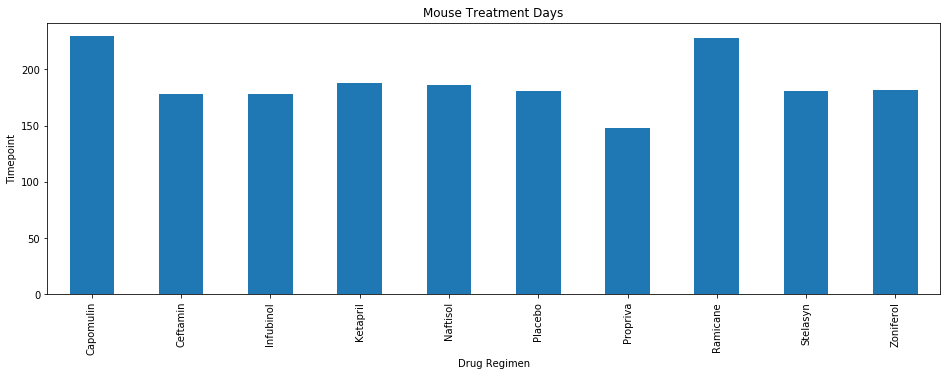

<Figure size 432x288 with 0 Axes>

In [68]:
mice_per_treatment_df.plot(kind="bar", figsize=(16,5))

plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.show()
plt.tight_layout()

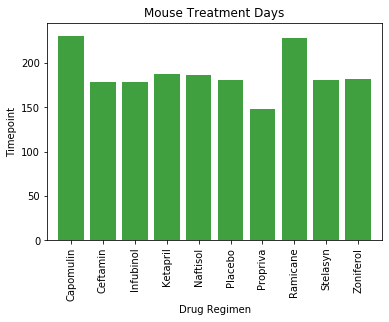

In [69]:
treatment = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
days = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

treatment = np.arange(len(mice_per_treatment_df))
tick_locations = []
for x in treatment:
    tick_locations.append(x)
    
plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.xlim(-0.75, len(treatment)-0.25)
plt.ylim(0, max(days) + 15)

plt.bar(treatment, days, facecolor="green", alpha=0.75, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')
plt.show()

## Pie Plots

In [70]:
gender_pie = Clean_Mouse_DF.groupby(['Sex', 'Mouse ID']).size()
gender_pie = pd.DataFrame(gender_pie.groupby(['Sex']).count())
gender_pie.columns = ['Total Gender Count']
gender_pie['% of Gender'] = (100*(gender_pie['Total Gender Count']/gender_pie['Total Gender Count'].sum()))
gender_pie

Total Gender Count  % of Gender
Sex                                    
Female                 123    49.596774
Male                   125    50.403226

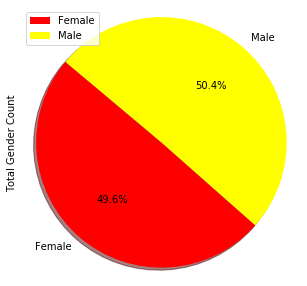

In [71]:
labels = ["Female", "Male"]
colors = ["Red", "yellow"]
explode = (0.1, 0)

plot = gender_pie.plot.pie(y='Total Gender Count', figsize=(5, 5), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plot.legend(loc="upper left")
plot.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
top_4_drugs = Clean_Mouse_DF[Clean_Mouse_DF["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_4_drugs = top_4_drugs.sort_values(["Timepoint"], ascending=True)
top_4_drugs_final = top_4_drugs[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
top_4_drugs_finals = pd.DataFrame(top_4_drugs_final)
top_4_drugs_finals.reset_index()

index Drug Regimen Mouse ID  Tumor Volume (mm3)
0        0    Capomulin     b128           45.000000
1      221     Ceftamin     q483           45.000000
2      220     Ceftamin     o287           45.000000
3      219     Ceftamin     b487           45.000000
4      218     Ceftamin     p438           45.000000
..     ...          ...      ...                 ...
809   1802    Infubinol     e476           62.435404
810   1804    Infubinol     a203           67.973419
811   1806    Infubinol     f345           60.918767
812   1810     Ceftamin     l471           67.748662
813   1890     Ceftamin     p438           61.433892

[814 rows x 4 columns]

In [73]:
Capo_quartiles = (top_4_drugs_finals.loc[top_4_drugs_finals["Drug Regimen"]== "Capomulin"]).quantile([.25,.5,.75]) 
Capo_lowerq = Capo_quartiles.loc[.25,"Tumor Volume (mm3)"]
Cap_upperq = Capo_quartiles.loc[.75,"Tumor Volume (mm3)"]
Cap_iqr =  Cap_upperq - Capo_lowerq
Caplowerbd = Capo_lowerq - (1.5*Cap_iqr)
Capupperbd = Cap_upperq + (1.5*Cap_iqr)


print(f"The the median of Capomulin is: {Capo_quartiles}")
print(f"The lower quartile of Capomulin is: {Capo_lowerq}")
print(f"The upper quartile of Capomulin is: {Cap_upperq}")
print(f"The interquartile range of Capomulin is: {Cap_iqr}")
print(f"The lower bound of Capomulin is: {Caplowerbd}")
print(f"The higher bound range of Capomulin is: {Capupperbd}")

Capomulin_final_df = pd.DataFrame(Capo_quartiles)
Capomulin_final_df

The the median of Capomulin is:       Tumor Volume (mm3)
0.25           37.685933
0.50           41.557809
0.75           45.000000
The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
The lower bound of Capomulin is: 26.714832162499995
The higher bound range of Capomulin is: 55.9711007025


Tumor Volume (mm3)
0.25           37.685933
0.50           41.557809
0.75           45.000000

In [75]:
Rami_quartiles = (top_4_drugs_finals.loc[top_4_drugs_finals["Drug Regimen"]== "Ramicane"]).quantile([.25,.5,.75])
Rami_lowerq = Rami_quartiles.loc[.25,"Tumor Volume (mm3)"]
Rami_upperq = Rami_quartiles.loc[.75,"Tumor Volume (mm3)"]
Rami_iqr =  Rami_upperq - Rami_lowerq
Ramilowerbd = Rami_lowerq - (1.5*Rami_iqr)
Ramiupperbd = Rami_upperq + (1.5*Rami_iqr)
Ramiupperbd

print(f"The the median of Ramicane is: {Rami_quartiles}")
print(f"The lower quartile of Ramicane is: {Rami_lowerq}")
print(f"The upper quartile of Ramicane is: {Rami_upperq}")
print(f"The interquartile range of Ramicane is: {Rami_iqr}")
print(f"The lower bound of Ramicane is: {Ramilowerbd}")
print(f"The higher bound range of Ramicane is: {Ramiupperbd}")

Ramicane_final_df = pd.DataFrame(Rami_quartiles)
Ramicane_final_df

The the median of Ramicane is:       Tumor Volume (mm3)
0.25           36.674635
0.50           40.673236
0.75           45.000000
The lower quartile of Ramicane is: 36.67463458499999
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415000007
The lower bound of Ramicane is: 24.18658646249998
The higher bound range of Ramicane is: 57.48804812250001


Tumor Volume (mm3)
0.25           36.674635
0.50           40.673236
0.75           45.000000

In [76]:
Infub_quartiles = (top_4_drugs_finals.loc[top_4_drugs_finals["Drug Regimen"]== "Infubinol"]).quantile([.25,.5,.75])
Infub_lowerq = Infub_quartiles.loc[.25,"Tumor Volume (mm3)"]
Infub_upperq = Infub_quartiles.loc[.75,"Tumor Volume (mm3)"]
Infub_iqr =  Infub_upperq - Infub_lowerq
Infublowerbd = Infub_lowerq - (1.5*Infub_iqr)
Infubupperbd = Infub_upperq + (1.5*Infub_iqr)

print(f"The the median of Infubinol is: {Infub_quartiles}")
print(f"The lower quartile of Infubinol is: {Infub_lowerq}")
print(f"The upper quartile of Infubinol is: {Infub_upperq}")
print(f"The interquartile range of Infubinol is: {Infub_iqr}")
print(f"The lower bound of Infubinol is: {Infublowerbd}")
print(f"The higher bound range of Infubinol is: {Infubupperbd}")

Infubinol_final_df = pd.DataFrame(Infub_quartiles)
Infubinol_final_df

The the median of Infubinol is:       Tumor Volume (mm3)
0.25           47.312353
0.50           51.820584
0.75           57.314444
The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
The lower bound of Infubinol is: 32.309217298749985
The higher bound range of Infubinol is: 72.31757996875001


Tumor Volume (mm3)
0.25           47.312353
0.50           51.820584
0.75           57.314444

In [77]:
Ceft_quartiles = (top_4_drugs_finals.loc[top_4_drugs_finals["Drug Regimen"]== "Ceftamin"]).quantile([.25,.5,.75])
Ceft_lowerq = Ceft_quartiles.loc[.25,"Tumor Volume (mm3)"]
Ceft_upperq = Ceft_quartiles.loc[.75,"Tumor Volume (mm3)"]
Ceft_iqr =  Ceft_upperq - Ceft_lowerq
Ceftlowerbd = Ceft_lowerq - (1.5*Ceft_iqr)
Ceftupperbd = Ceft_upperq + (1.5*Ceft_iqr)

print(f"The the median of Ceftamin is: {Ceft_quartiles}")
print(f"The lower quartile of Ceftamin is: {Ceft_lowerq}")
print(f"The upper quartile of Ceftamin is: {Ceft_upperq}")
print(f"The interquartile range of Ceftamin is: {Ceft_iqr}")
print(f"The lower bound of Ceftamin is: {Ceftlowerbd}")
print(f"The higher bound range of Ceftamin is: {Ceftupperbd}")

Ceftamin_final_df = pd.DataFrame(Ceft_quartiles)
Ceftamin_final_df

The the median of Ceftamin is:       Tumor Volume (mm3)
0.25           47.208427
0.50           51.776157
0.75           56.801438
The lower quartile of Ceftamin is: 47.208427112500004
The upper quartile of Ceftamin is: 56.801437570000004
The interquartile range of Ceftamin is: 9.5930104575
The lower bound of Ceftamin is: 32.818911426250004
The higher bound range of Ceftamin is: 71.19095325625


Tumor Volume (mm3)
0.25           47.208427
0.50           51.776157
0.75           56.801438

In [80]:
import matplotlib.pyplot as plot

lasttmvol_top4_final = top_4_drugs_finals.groupby(["Drug Regimen", "Mouse ID"]).last()['Tumor Volume (mm3)']


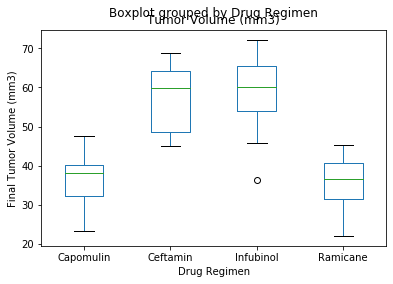

In [81]:
lasttmvol_top4_final_df = pd.DataFrame(lasttmvol_top4_final)
lasttmvol_top4_final_df.reset_index()

lasttmvol_top4_final_df.boxplot(by='Drug Regimen', column =['Tumor Volume (mm3)'], grid=False)
                                          
plot.xlabel("Drug Regimen")
plot.ylabel("Final Tumor Volume (mm3)")
plot.show()

## Line and Scatter Plots

In [82]:
timepoint_vs_tumorvol = Clean_Mouse_DF[Clean_Mouse_DF['Mouse ID']=='l509'] 
timepoint_vs_tumorvol_final = timepoint_vs_tumorvol[["Drug Regimen", "Mouse ID", "Timepoint", "Weight (g)", "Tumor Volume (mm3)"]]
timepoint_vs_tumorvol_final = pd.DataFrame(timepoint_vs_tumorvol_final)   
timepoint_vs_tumorvol_final

Drug Regimen Mouse ID  Timepoint  Weight (g)  Tumor Volume (mm3)
231     Capomulin     l509          0          21           45.000000
253     Capomulin     l509          5          21           45.851193
539     Capomulin     l509         10          21           46.759074
881     Capomulin     l509         15          21           47.488599
982     Capomulin     l509         20          21           48.070452
1146    Capomulin     l509         25          21           44.006257
1414    Capomulin     l509         30          21           44.708055
1499    Capomulin     l509         35          21           40.207289
1723    Capomulin     l509         40          21           40.770813
1771    Capomulin     l509         45          21           41.483008

In [94]:
Capo_lineplot_data = timepoint_vs_tumorvol_final[["Timepoint", "Tumor Volume (mm3)"]]
Capo_lineplot_data.head()


Timepoint  Tumor Volume (mm3)
231          0           45.000000
253          5           45.851193
539         10           46.759074
881         15           47.488599
982         20           48.070452

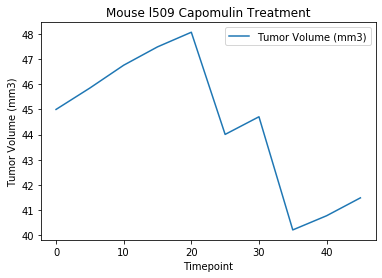

In [100]:
lines = Capo_lineplot_data.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title("Mouse l509 Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

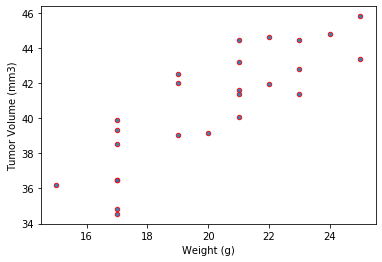

In [103]:
scatter_mw_vs_tmvol = Clean_Mouse_DF.loc[Clean_Mouse_DF['Drug Regimen']== 'Capomulin']
scatter_mw_vs_tmvol_df = scatter_mw_vs_tmvol.groupby('Mouse ID').mean()
scatter_mw_vs_tmvol_df_final = pd.DataFrame(scatter_mw_vs_tmvol_df)
scatter_mw_vs_tmvol_df_final

Capomulin_scat = scatter_mw_vs_tmvol_df.plot(kind='scatter', x='Weight (g)', y ='Tumor Volume (mm3)', facecolors="orange", edgecolors="red", alpha=0.9)
plt.show()

## Correlation and Regression

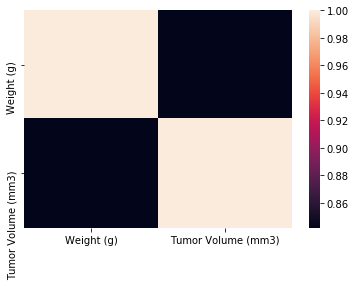

In [108]:
import seaborn as sns

Correlation_df=scatter_mw_vs_tmvol_df_final[["Weight (g)","Tumor Volume (mm3)"]]
Corr = Correlation_df.corr()
sns.heatmap(Corr)

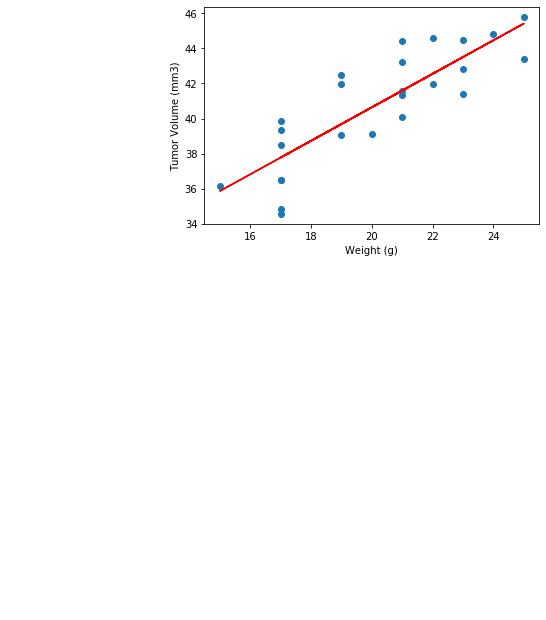

In [111]:
from matplotlib import pyplot as plt
from scipy.stats import linregress

x_values = scatter_mw_vs_tmvol_df_final["Weight (g)"]
y_values = scatter_mw_vs_tmvol_df_final["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,12),fontsize=15,color="bleu")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()